## Projet 6 - Analysez les ventes d'une librairie avec R ou Python

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm;
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

folder = "/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 6/"
complet = folder + "df_complet.csv"

#### Importation du df traité et nettoyé:

In [361]:
df_complet = pd.read_csv(complet)
df_complet.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year,month,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,37,4.18,0.0,2022,2022-05,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,35,15.99,1.0,2022,2022-02,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,55,7.99,0.0,2022,2022-06,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,23,69.99,2.0,2021,2021-06,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,43,4.99,0.0,2023,2023-01,2023-01-11


In [362]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  int64  
 6   age         679332 non-null  int64  
 7   price       679332 non-null  float64
 8   categ       679332 non-null  float64
 9   year        679332 non-null  int64  
 10  month       679332 non-null  object 
 11  day         679332 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 62.2+ MB


**Transformer la colonne 'date' en datetime:**

In [363]:
df_complet["date"] = pd.to_datetime(df_complet["date"], yearfirst= True)
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  float64       
 9   year        679332 non-null  int64         
 10  month       679332 non-null  object        
 11  day         679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 62.2+ MB


### 1) Analyse des différents indicateurs et graphiques autour du chiffre d'affaire. 

**CA Total de l'ensembre de toutes les ventes:**

In [364]:
CA_total = df_complet.price.sum()
print('Le CA total réalisé est de {:,} euros'.format(df_complet.price.sum()))

Le CA total réalisé est de 11,855,936.47 euros


In [365]:
print('Le total de ventes réalisées est de {:,}'.format(df_complet.session_id.count()))

Le total de ventes réalisées est de 679,332


In [366]:
ca_annuel = df_complet.groupby(["year"])["price"].sum()
print("Chiffres d'affaires annuels:\n", ca_annuel)

Chiffres d'affaires annuels:
 year
2021    4771695.69
2022    6109880.61
2023     974360.17
Name: price, dtype: float64


**Analyse des ventes annuelles:**

In [367]:
ventes_annuelles = df_complet.groupby(["year"])["session_id"].count()
print("Nombre de ventes annuelles:\n", ventes_annuelles)

Nombre de ventes annuelles:
 year
2021    278335
2022    346500
2023     54497
Name: session_id, dtype: int64


In [368]:
print(df_complet["date"].nlargest(3))

84255    2023-02-28 23:58:30.792755
550293   2023-02-28 23:58:00.107815
130140   2023-02-28 23:53:18.929676
Name: date, dtype: datetime64[ns]


2022 est la meilleure année pour les ventes mais l'année 2023 n'est pas encore terminée. La dernière vente de 2023 a été effectuée le 2023-02-28

**CA et nombre de ventes mensuelles par année:**

In [369]:
df_complet = df_complet.sort_values(["date"],ascending=True)
ca_mensuel = df_complet.groupby(["year","month"])["price"].sum()
ca_mensuel

year  month  
2021  2021-03    482530.52
      2021-04    476249.16
      2021-05    493023.39
      2021-06    484158.49
      2021-07    482875.36
      2021-08    482374.70
      2021-09    507360.56
      2021-10    320868.67
      2021-11    516267.63
      2021-12    525987.21
2022  2022-01    525388.94
      2022-02    535681.39
      2022-03    515566.42
      2022-04    493138.80
      2022-05    517292.44
      2022-06    496086.05
      2022-07    510903.00
      2022-08    506547.19
      2022-09    494204.44
      2022-10    508017.67
      2022-11    496774.83
      2022-12    510279.44
2023  2023-01    517610.48
      2023-02    456749.69
Name: price, dtype: float64

Constat: Montant des ventes mensuelles stables, sauf pour le mois d'octobre 2021

In [370]:
ventes_mensuelles = df_complet.groupby(["year", "month"])["session_id"].count()
ventes_mensuelles

year  month  
2021  2021-03    28610
      2021-04    28457
      2021-05    28293
      2021-06    26857
      2021-07    24742
      2021-08    25659
      2021-09    33326
      2021-10    21606
      2021-11    28321
      2021-12    32464
2022  2022-01    29348
      2022-02    29605
      2022-03    29707
      2022-04    27616
      2022-05    29991
      2022-06    28511
      2022-07    28682
      2022-08    28552
      2022-09    28315
      2022-10    28974
      2022-11    28574
      2022-12    28625
2023  2023-01    28945
      2023-02    25552
Name: session_id, dtype: int64

In [371]:
df_complet[['0','1','2']]=pd.get_dummies(df_complet['categ'])
df_complet[['m','f']]=pd.get_dummies(df_complet['sex'])
df_all_by_month=df_complet.groupby('month').agg(
    age=('age', np.mean),
    m=('m', np.count_nonzero),
    f=('f', np.count_nonzero),
    amount=('price', np.sum),
    avg_price=('price', np.mean),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_month.sort_values(by='month',ascending=True,inplace=True)
df_all_by_month['amount']=df_all_by_month['amount'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['avg_price']=df_all_by_month['avg_price'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['age']=df_all_by_month['age'].apply(lambda x : "{:,.1f}".format(x))
df_all_by_month.head(10)

,age,m,f,amount,avg_price,count,categ_0,categ_1,categ_2
month,,,,,,,,,
2021-03,45.2,14161,14449,"482,530.52",16.87,28610,18140,9134,1336
2021-04,44.9,14283,14174,"476,249.16",16.74,28457,19356,7579,1522
2021-05,45.0,14219,14074,"493,023.39",17.43,28293,18509,8107,1677
2021-06,45.0,13303,13554,"484,158.49",18.03,26857,15905,9264,1688
2021-07,44.8,12285,12457,"482,875.36",19.52,24742,13582,9169,1991
2021-08,44.7,12771,12888,"482,374.70",18.80,25659,15737,7954,1968
2021-09,45.7,16402,16924,"507,360.56",15.22,33326,23154,9268,904
2021-10,44.1,10495,11111,"320,868.67",14.85,21606,18769,1666,1171
2021-11,45.6,14060,14261,"516,267.63",18.23,28321,14610,12316,1395


**Creation d'un dataframe specifique par categories avec fonction d'agregation:**

In [506]:
df_mensu_agg = df_complet[["categ", "price", "year", "month"]]
df_mensu_agg = pd.pivot_table(df_mensu_agg, index=["year","month"], columns=["categ"], aggfunc=["sum", "count"]).reset_index()
df_mensu_agg.columns = ["year", "month", "categ_0", "categ_1", "categ_2", "nombre_categ_0", "nombre_categ_1", "nombre_categ_2"]
df_mensu_agg.set_index('month',inplace = True)
df_mensu_agg.head()

,year,categ_0,categ_1,categ_2,nombre_categ_0,nombre_categ_1,nombre_categ_2
month,,,,,,,
2021-03,2021,193719.08,186974.17,101837.27,18140,9134,1336
2021-04,2021,205362.32,156138.35,114748.49,19356,7579,1522
2021-05,2021,196266.64,165893.40,130863.35,18509,8107,1677
2021-06,2021,168013.08,189162.04,126983.37,15905,9264,1688
2021-07,2021,144790.75,188523.27,149561.34,13582,9169,1991


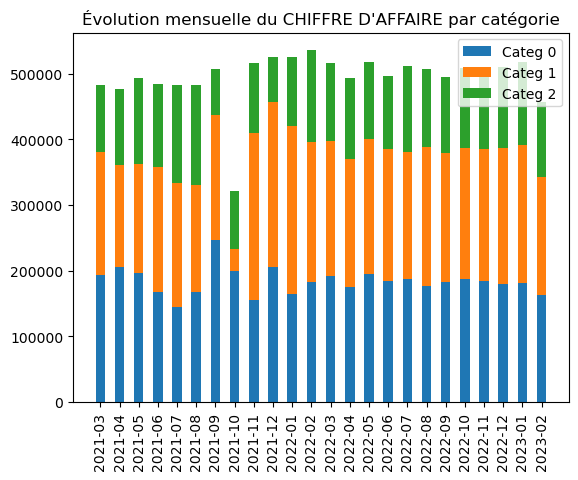

In [374]:
mois = df_mensu_agg.index

CA_categ = {
    "Categ 0": df_mensu_agg["categ_0"],
    "Categ 1": df_mensu_agg["categ_1"],
    "Categ 2": df_mensu_agg["categ_2"],
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(df_mensu_agg.shape[0])

for boolean, CA_categ in CA_categ.items():
    p = ax.bar(mois, CA_categ, width, label=boolean, bottom=bottom)
    bottom += CA_categ

ax.set_title("Évolution mensuelle du CHIFFRE D'AFFAIRE par catégorie")
ax.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

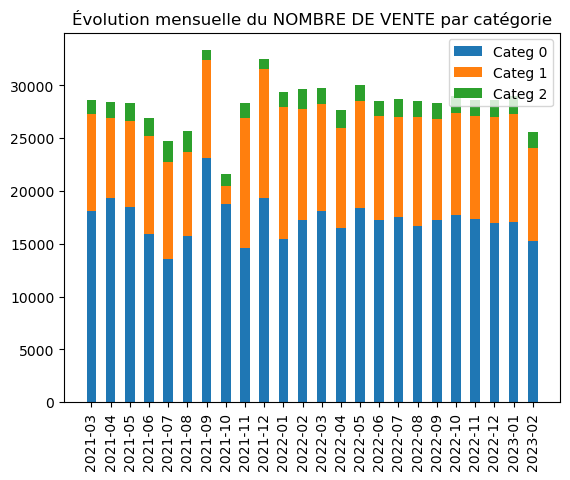

In [375]:
mois = df_mensu_agg.index

CA_categ = {
    "Categ 0": df_mensu_agg["nombre_categ_0"],
    "Categ 1": df_mensu_agg["nombre_categ_1"],
    "Categ 2": df_mensu_agg["nombre_categ_2"],
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(df_mensu_agg.shape[0])

for boolean, CA_categ in CA_categ.items():
    p = ax.bar(mois, CA_categ, width, label=boolean, bottom=bottom)
    bottom += CA_categ

ax.set_title("Évolution mensuelle du NOMBRE DE VENTE par catégorie")
ax.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

**On remarque que les ventes de catégorie 1 a eu une forte baisse au mois d'octobre 2021**

### Zoom sur le mois d'octobre 2021:

In [505]:
df_par_jour=df_complet[(df_complet.month=='2021-10')&(df_complet.categ==0)].groupby('day').agg(
    categ_0=('price', np.sum))
df_par_jour['categ_1']=df_complet[(df_complet.month=='2021-10')&(df_complet.categ==1)].groupby('day').agg(
    categ_1=('price', np.sum))
df_par_jour['categ_2']=df_complet[(df_complet.month=='2021-10')&(df_complet.categ==2)].groupby('day').agg(
    categ_2=('price', np.sum))
df_par_jour.head()

,categ_0,categ_1,categ_2
day,,,
2021-10-01,6950.50,7003.79,3104.05
2021-10-02,7141.01,NaN,2041.12
2021-10-03,6786.57,NaN,2206.48
2021-10-04,6553.58,NaN,2746.08
2021-10-05,6357.91,NaN,3032.55


<AxesSubplot:xlabel='day'>

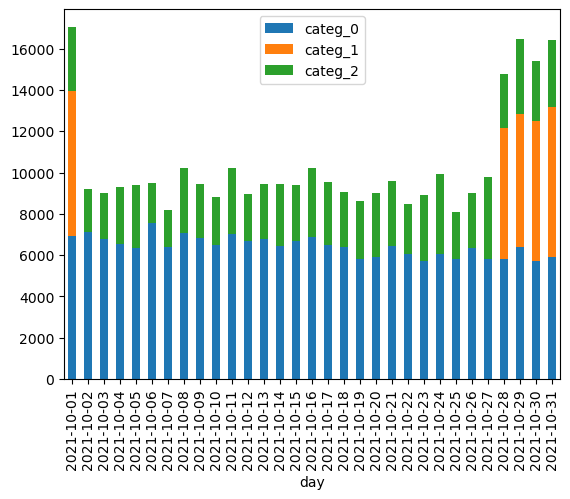

In [504]:
df_par_jour.plot(kind="bar",stacked=True)

**Il n'y a pas eu de ventes de livres de catégorie 1 entre le 1er et le 28 octobre 2021** 

**Calcul de la Moyenne Mobile du Chiffre d'affaire:**

In [376]:
Moyenne_mobile = ca_mensuel.rolling(3).mean()
Moyenne_mobile

year  month  
2021  2021-03              NaN
      2021-04              NaN
      2021-05    483934.356667
      2021-06    484477.013333
      2021-07    486685.746667
      2021-08    483136.183333
      2021-09    490870.206667
      2021-10    436867.976667
      2021-11    448165.620000
      2021-12    454374.503333
2022  2022-01    522547.926667
      2022-02    529019.180000
      2022-03    525545.583333
      2022-04    514795.536667
      2022-05    508665.886667
      2022-06    502172.430000
      2022-07    508093.830000
      2022-08    504512.080000
      2022-09    503884.876667
      2022-10    502923.100000
      2022-11    499665.646667
      2022-12    505023.980000
2023  2023-01    508221.583333
      2023-02    494879.870000
Name: price, dtype: float64

In [377]:
df_prix = pd.DataFrame({'ca_mensuel':ca_mensuel,'MA_3': ca_mensuel.rolling(3).mean(), 
                        'MA_5': ca_mensuel.rolling(5).mean()})
df_prix

ca_mensuel           MA_3        MA_5
year month                                         
2021 2021-03   482530.52            NaN         NaN
     2021-04   476249.16            NaN         NaN
     2021-05   493023.39  483934.356667         NaN
     2021-06   484158.49  484477.013333         NaN
     2021-07   482875.36  486685.746667  483767.384
     2021-08   482374.70  483136.183333  483736.220
     2021-09   507360.56  490870.206667  489958.500
     2021-10   320868.67  436867.976667  455527.556
     2021-11   516267.63  448165.620000  461949.384
     2021-12   525987.21  454374.503333  470571.754
2022 2022-01   525388.94  522547.926667  479174.602
     2022-02   535681.39  529019.180000  484838.768
     2022-03   515566.42  525545.583333  523778.318
     2022-04   493138.80  514795.536667  519152.552
     2022-05   517292.44  508665.886667  517413.598
     2022-06   496086.05  502172.430000  511553.020
     2022-07   510903.00  508093.830000  506597.342
     2022-08   506547.19  504512.080000  504793.496
     2022-09   494204.44  503884.876667  505006.624
     2022-10   508017.67  502923.100000  503151.670
     2022-11   496774.83  499665.646667  503289.426
     2022-12   510279.44  505023.980000  503164.714
2023 2023-01   517610.48  508221.583333  505377.372
     2023-02   456749.69  494879.870000  497886.422

<Figure size 2000x600 with 0 Axes>

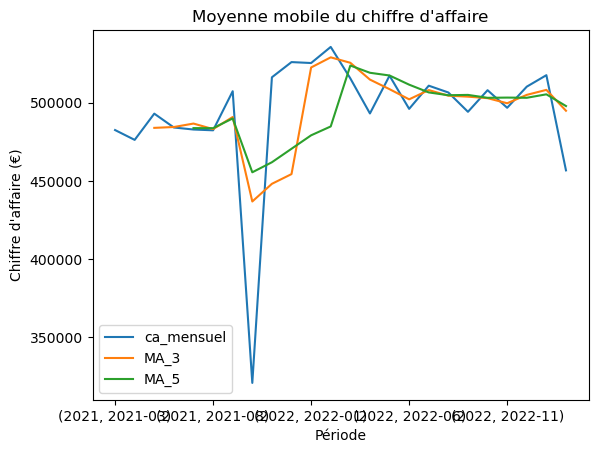

In [378]:
from matplotlib.pyplot import figure
plt.figure(figsize = (20,6))
df_prix.plot()
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaire (€)")
plt.title("Moyenne mobile du chiffre d'affaire")
plt.show()

Baisse significative du CA en octobre 2021

In [379]:
Octobre_df = df_complet[df_complet.month=='2021-10']
Octobre_df = Octobre_df.groupby(["day","categ"]).agg({"price":["sum","count"]}).reset_index()
Octobre_df = pd.pivot_table(Octobre_df, columns=["categ"], index=["day"]).reset_index()
Octobre_df.columns = ["day", 'ca_categ_0', 'ca_categ_1', 'ca_categ_2', 'nombre_categ_0', 'nombre_categ_1', 'nombre_categ_2']
Octobre_df.head()

/var/folders/5w/5rjkgb0d1f3fk31jcmfx03700000gn/T/ipykernel_62978/507956255.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Octobre_df = pd.pivot_table(Octobre_df, columns=["categ"], index=["day"]).reset_index()


,day,ca_categ_0,ca_categ_1,ca_categ_2,nombre_categ_0,nombre_categ_1,nombre_categ_2
0,2021-10-01,663.0,344.0,38.0,6950.50,7003.79,3104.05
1,2021-10-02,661.0,NaN,28.0,7141.01,NaN,2041.12
2,2021-10-03,648.0,NaN,31.0,6786.57,NaN,2206.48
3,2021-10-04,603.0,NaN,38.0,6553.58,NaN,2746.08
4,2021-10-05,594.0,NaN,38.0,6357.91,NaN,3032.55


Manque de ventes de livres de catégorie 1 entre le 1er et le 28 octobre 2021

In [582]:
df_complet.drop(df_complet[df_complet.month=='2022-10'].index,inplace=True)
df_complet.head(100)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year,month,day,0,1,2,m,f
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,56,11.99,0.0,2021,2021-03,2021-03-01,1,0,0,1,0
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,63,19.37,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,35,4.50,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,34,6.55,0.0,2021,2021-03,2021-03-01,1,0,0,1,0
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,67,16.49,0.0,2021,2021-03,2021-03-01,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114311,0_1000,2021-03-01 02:24:57.000491,s_57,c_7299,m,1983,40,6.84,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
116684,1_260,2021-03-01 02:26:48.641066,s_58,c_2940,f,1982,41,17.63,1.0,2021,2021-03,2021-03-01,0,1,0,1,0
671534,0_2291,2021-03-01 02:27:16.265514,s_59,c_6917,f,1984,39,12.99,0.0,2021,2021-03,2021-03-01,1,0,0,1,0
640851,1_39,2021-03-01 02:40:29.041503,s_39,c_184,m,2004,19,12.99,1.0,2021,2021-03,2021-03-01,0,1,0,0,1


## Zoom sur les références:

**CA par produit:**

In [381]:
CA_produit = df_complet.groupby(["id_prod"])["price"].sum()
CA_produit

id_prod
0_0        4657.50
0_1        5352.13
0_10        394.90
0_100        61.80
0_1000     2954.88
            ...   
2_95        395.96
2_96      28650.18
2_97       2092.87
2_98        149.74
2_99        594.93
Name: price, Length: 3266, dtype: float64

### LES TOPS - Les produits que génèrent le plus de CA:

In [382]:
CA_produit.nlargest(10)

id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12
Name: price, dtype: float64

Les livres qui génèrent le plus de CA sont ceux de la categ 2

### LES FLOPS - Les produits que génèrent le moins de CA:

In [383]:
CA_produit.nsmallest(10)

id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_1601    1.99
0_541     1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64

Les livres qui génèrent le moins de CA sont ceux de la categ 0

In [384]:
nombre_ventes = df_complet.groupby(["id_prod"])["session_id"].count()
nombre_ventes 

id_prod
0_0       1242
0_1        487
0_10        22
0_100        3
0_1000     432
          ... 
2_95         4
2_96       598
2_97        13
2_98         1
2_99         7
Name: session_id, Length: 3266, dtype: int64

In [385]:
nombre_ventes.nlargest(10)

id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
Name: session_id, dtype: int64

Les 10 livres les plus vendus appartiennent à la categ 1

In [386]:
nombre_ventes.nsmallest(10)

id_prod
0_1151    1
0_1284    1
0_1379    1
0_1498    1
0_1539    1
0_1601    1
0_1633    1
0_1683    1
0_1728    1
0_2201    1
Name: session_id, dtype: int64

Les livres les moins vendus sont ceux de la categ 0

**Prix moyen d'un livre selon sa catégorie:**

In [387]:
prix_categ = df_complet.groupby(["categ"])["price"].mean()
prix_categ

categ
0.0    10.637843
1.0    20.485730
2.0    76.207412
Name: price, dtype: float64

**Réprésentation graphique du Chiffre d'affaire par catégorie:**

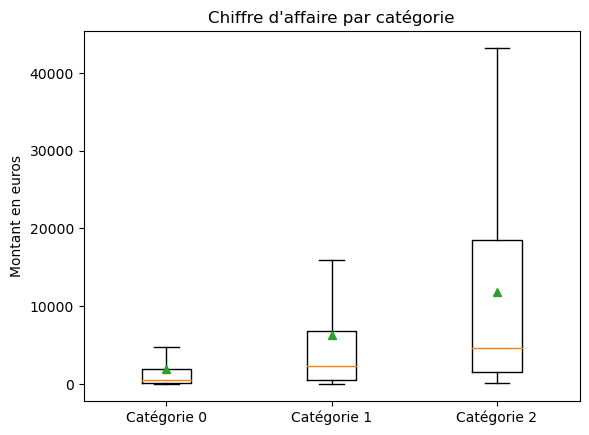

In [388]:
CA_produit_0 = df_complet[df_complet.categ==0].groupby(["id_prod"])["price"].sum()
CA_produit_1 = df_complet[df_complet.categ==1].groupby(["id_prod"])["price"].sum()
CA_produit_2 = df_complet[df_complet.categ==2].groupby(["id_prod"])["price"].sum()

plt.boxplot([
    CA_produit_0,
    CA_produit_1,
    CA_produit_2]
    ,labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],showmeans=True, showfliers=False)
plt.ylabel("Montant en euros")
plt.title("Chiffre d'affaire par catégorie")
plt.show()

crosstab: voir s'il a une relation H F et voir si a une relation avec les categorie des produits

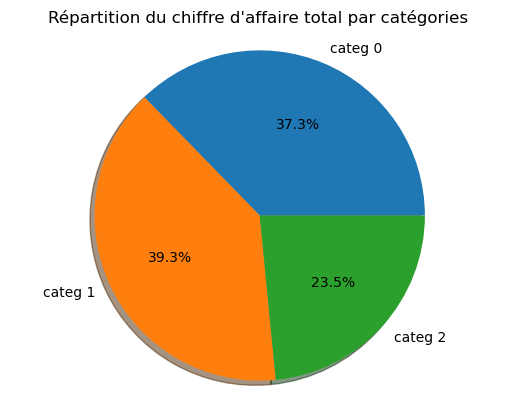

In [467]:
ca_categ = df_complet.groupby(df_complet["categ"])["price"].sum()
fig1, ax1 = plt.subplots()
ax1.pie(ca_categ,
        labels=["categ 0","categ 1","categ 2"],
        autopct="%1.1f%%",
        shadow=True)
ax1.axis("equal")
plt.title("Répartition du chiffre d'affaire total par catégories")
plt.show()

Différences de prix, en particulier pour les livres de la catégorie 2. Les meilleures ventes sont de la catégorie 1 

**Courbe de Lorentz: Repartition para nombre de ventes et par Chiffre d'affaire:**

indice de Gini: 0.694


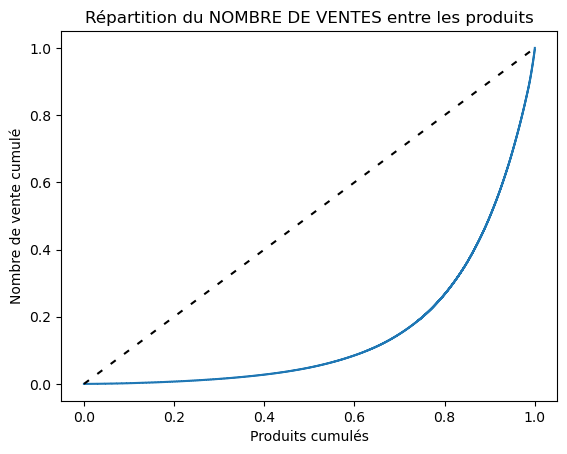

In [390]:
nb_prod_lorenz = np.cumsum(np.sort(nombre_ventes)) / nombre_ventes.sum()
nb_prod_lorenz = np.append([0], nb_prod_lorenz)
plt.plot(np.linspace(0,1,len(nb_prod_lorenz)), nb_prod_lorenz, drawstyle='steps-post'),
plt.plot(np.linspace(0,1,len(nb_prod_lorenz)+1), np.linspace(0,1,len(nb_prod_lorenz)+1),color ="black", dashes=[3,5])
plt.ylabel("Nombre de vente cumulé")
plt.xlabel("Produits cumulés")
plt.title("Répartition du NOMBRE DE VENTES entre les produits")
courbe_nb_prod = nb_prod_lorenz[:-1].sum() / len(nb_prod_lorenz)
S_nb_prod = 0.5 - courbe_nb_prod
nb_prod_gini = 2* S_nb_prod
print("indice de Gini:",round(nb_prod_gini,3))


indice de Gini: 0.743


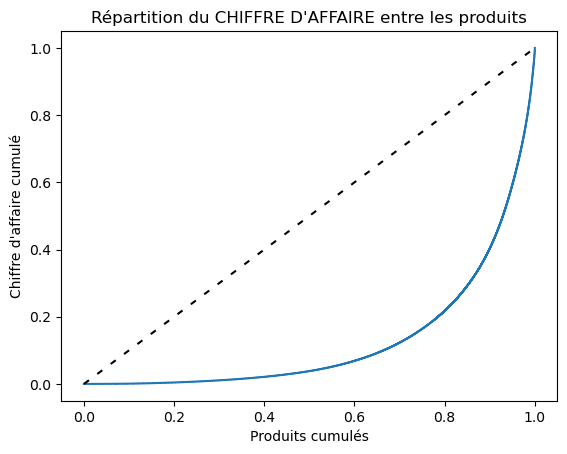

In [391]:
ca_prod_lorenz = np.cumsum(np.sort(CA_produit)) / CA_produit.sum()
ca_prod_lorenz = np.append([0], ca_prod_lorenz)
plt.plot(np.linspace(0,1,len(ca_prod_lorenz)), ca_prod_lorenz, drawstyle='steps-post'),
plt.plot(np.linspace(0,1,len(ca_prod_lorenz)+1), np.linspace(0,1,len(ca_prod_lorenz)+1),color ="black", dashes=[3,5])
plt.ylabel("Chiffre d'affaire cumulé")
plt.xlabel("Produits cumulés")
plt.title("Répartition du CHIFFRE D'AFFAIRE entre les produits")
courbe_ca_prod = ca_prod_lorenz[:-1].sum() / len(ca_prod_lorenz)
S_ca_prod = 0.5 - courbe_ca_prod
ca_prod_gini = 2* S_ca_prod
print("indice de Gini:",round(ca_prod_gini,3))


L'indice de Gini s'éloigne de 0 (réprésent 60% de la surface de Gini). La répartition du chiffre d'affaires par produit est très inégale.

**Nombre moyen d'achats par sessions:**

In [468]:
print("Il y a eu",
      df_complet["session_id"].nunique(),
      "sessions")

print("Une session aboutie en moyenne à",
      round(df_complet.groupby(["session_id","client_id"])["id_prod"].count().mean(),2),
      "achats")

Il y a eu 342315 sessions
Une session aboutie en moyenne à 1.98 achats


### Analyse sur le profil des clients: 

**Clients ayant le plus dépensé:**

In [521]:
prix_par_client = df_complet.groupby(["client_id"])["price"].sum()
prix_par_client.nlargest(10).iloc[:4].sum()/prix_par_client.sum()

0.0743189247200816

**4 clients ont l'habitude d'acheter en quantité. Zoom sur le profil de celui qui achète le plus (c_1609):**

In [393]:
zoom_client = df_complet[df_complet.client_id=='c_1609']
zoom_client

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year,month,day,0,1,2,m,f
524419,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,m,1980,43,5.86,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
256662,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,m,1980,43,7.99,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
583300,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,m,1980,43,12.99,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
423720,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,m,1980,43,14.99,0.0,2021,2021-03,2021-03-01,1,0,0,0,1
209933,1_406,2021-03-01 02:41:13.649521,s_63,c_1609,m,1980,43,24.81,1.0,2021,2021-03,2021-03-01,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423961,1_735,2023-02-28 21:42:40.632842,s_348401,c_1609,m,1980,43,22.99,1.0,2023,2023-02,2023-02-28,0,1,0,0,1
148018,0_1594,2023-02-28 22:04:16.664518,s_348409,c_1609,m,1980,43,3.33,0.0,2023,2023-02,2023-02-28,1,0,0,0,1
584776,0_1940,2023-02-28 22:09:50.559145,s_348409,c_1609,m,1980,43,18.31,0.0,2023,2023-02,2023-02-28,1,0,0,0,1
444817,0_1002,2023-02-28 22:27:00.464046,s_348409,c_1609,m,1980,43,8.31,0.0,2023,2023-02,2023-02-28,1,0,0,0,1


In [394]:
c_1609 = df_complet[df_complet.client_id=='c_1609'].groupby(['id_prod'])["session_id"].count()
c_1609.nlargest(10)

id_prod
0_1438    95
0_1360    79
0_1334    78
0_1424    75
0_1411    73
0_1461    73
0_1465    71
0_1470    70
0_1453    69
0_1351    66
Name: session_id, dtype: int64

Le cliente c_1609, un homme de 43 ans a acheté plusieurs fois les mêmes livres. Lui et les autres trois top acheteurs, peuvent être des revendeurs.

**Nombre d'achat moyen par client:**

In [395]:
nombre_achat_moyen = df_complet.groupby(["client_id"])["session_id"].count().mean()
nombre_achat_moyen

78.99209302325582

**Montant d'achat par client:**

In [396]:
achat_par_client = df_complet.groupby(["client_id"])["price"].count()
achat_par_client

client_id
c_1        39
c_10       58
c_100       8
c_1000    125
c_1001    102
         ... 
c_995      14
c_996      95
c_997      59
c_998      53
c_999      46
Name: price, Length: 8600, dtype: int64

### Analyse CA et Nombre de ventes X  Genre:

**Depenses par genre:**

In [397]:
division_genre = df_complet.groupby(["sex"])["client_id"].count()
division_genre

sex
f    338402
m    340930
Name: client_id, dtype: int64

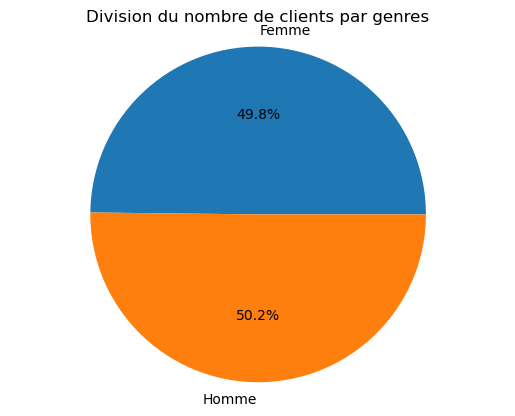

In [398]:
fig2, ax2 = plt.subplots()
ax2.pie(division_genre,
        labels=["Femme","Homme"],
        autopct="%1.1f%%")
ax2.axis("equal")
plt.title("Division du nombre de clients par genres")
plt.show()

Le nombre d'hommes et femmes parmis nos clients est quasiment égal

**CA généré par genre:**

In [399]:
ca_genre = df_complet.groupby(["sex"])["price"].sum()
ca_genre

sex
f    5860851.96
m    5995084.51
Name: price, dtype: float64

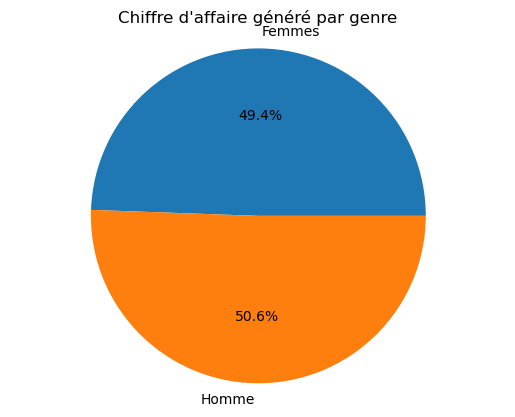

In [400]:
fig2, ax2 = plt.subplots()
ax2.pie(ca_genre,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%")
ax2.axis("equal")
plt.title("Chiffre d'affaire généré par genre")
plt.show()

Le CA généné par genre parmis nos clients est quasiment égal

**Courbe de Lorentz: Repartition du CA par client:**

indice de Gini: 0.447


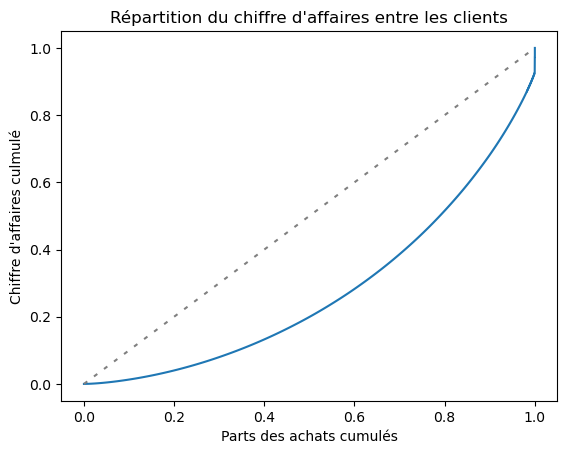

In [401]:
lorenz_CA_client = np.cumsum(np.sort(prix_par_client)) / prix_par_client.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), np.linspace(0,1,len(lorenz_CA_client)), color ="grey", dashes=[2,4])
plt.ylabel("Chiffre d'affaires culmulé")
plt.xlabel("Parts des achats cumulés")
plt.title("Répartition du chiffre d'affaires entre les clients")
courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

In [508]:
lorenz_CA_client

array([0.00000000e+00, 5.32222825e-07, 1.23229405e-06, ...,
       9.48229000e-01, 9.72669105e-01, 1.00000000e+00])

indice de Gini: 0.498


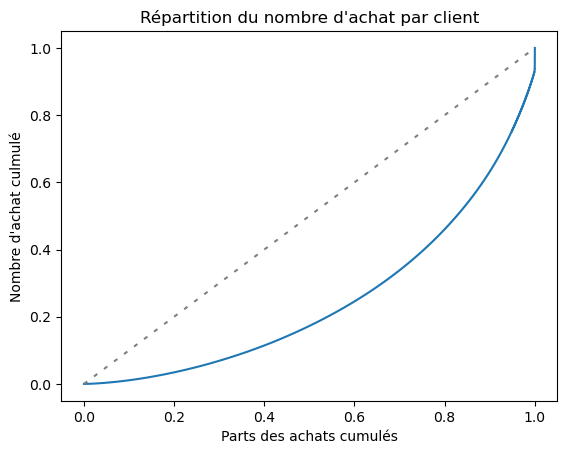

In [402]:
lorenz_NB_client = np.cumsum(np.sort(achat_par_client)) / achat_par_client.sum()
lorenz_NB_client = np.append([0], lorenz_NB_client)
plt.plot(np.linspace(0,1,len(lorenz_NB_client)), lorenz_NB_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_NB_client)), np.linspace(0,1,len(lorenz_NB_client)), color ="grey", dashes=[2,4])
plt.ylabel("Nombre d'achat culmulé")
plt.xlabel("Parts des achats cumulés")
plt.title("Répartition du nombre d'achat par client")
courbe_NB_client = lorenz_NB_client[:-1].sum() / len(lorenz_NB_client)
S_nb_client = 0.5 - courbe_NB_client
gini_NB_client = 2*S_nb_client
print("indice de Gini:",round(gini_NB_client,3))


**Analyse entre le genre d’un client et les catégories des livres achetés:** 

**Table de contingence pour Chi²:**

In [523]:
crosstab_categ_sex = pd.crosstab(df_complet['sex'], df_complet['categ'])
crosstab_categ_sex

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [524]:
chi2, p_value, do_freedom, expected_value = st.chi2_contingency(crosstab_categ_sex)

print("Les fréquences théoriques sont:\n", expected_value,3)
print(f"Le X² est de {chi2:.3f} à", do_freedom, "ddl")
print(f"La p-value est de", p_value)

Les fréquences théoriques sont:
 [[207066.56444861 113161.81769444  18173.61785695]
 [208613.43555139 114007.18230556  18309.38214305]] 3
Le X² est de 147.003 à 2 ddl
La p-value est de 1.1989607410166063e-32


**H0: Il n'y aurait pas de rélation entre une catégorie achétée et le genre de l'acheteur.**

Teste d'hypothese pour un crosstab: 
H0: il n'y a pas de rélation entre la catégorie et le sexe
H1: c'est l'inverse de H0 = il y a une rélation entre la categ et le sexe


4 resultats: 147: valeur Chi2

1,19e-32  Pvalue est inférieur à alfa qui est égal à 0,05 (5%)
quand elle est inférieure à alfa, on rejete H0, c'est-à-dire, il y a une rélation entre la categ et le sexe

2: dégré de liberté 

array: expected count

**Calcul de Cramer's V:**

In [526]:
K = min(crosstab_categ_sex.shape)
N = crosstab_categ_sex.sum().sum()
Cramers_v = round(np.sqrt(chi2/N)/(K-1),3)
Cramers_v

0.015

Cramers'V entre 00,00 et 00,10 - Relation Négligeable 

Analyse des variables catégories achetées et genre: Les catégories achetées ne dépendent pas du genre de l'acheteur.

<AxesSubplot:xlabel='categ'>

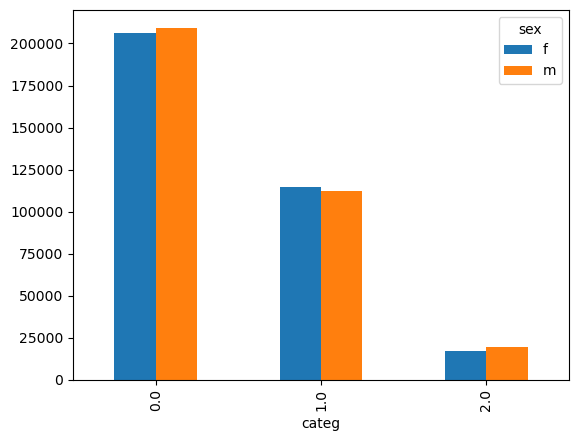

In [534]:
crosstab_categ_sex.T.plot.bar()

## One way anova:
#pré-requis por le test ANOVA: il faut que les 3 sous group suivent une loi normale

### Rélation entre la catégorie achetée et l'age des clients:

In [481]:
categ = df_complet["categ"].unique()
categ_age = {categ: df_complet.loc[df_complet["categ"]==categ, "age"] for categ in categ}
categ_age

{0.0: 480501    56
 428350    63
 462563    35
 488153    34
 438944    67
           ..
 456768    37
 414761    39
 428944    46
 550293    70
 84255     42
 Name: age, Length: 415680, dtype: int64,
 1.0: 479846    55
 326940    40
 138881    53
 522059    41
 202590    34
           ..
 388966    39
 453363    43
 118885    51
 184602    27
 130140    38
 Name: age, Length: 227169, dtype: int64,
 2.0: 247066    19
 342045    19
 382323    19
 199007    22
 287606    19
           ..
 647223    24
 501332    77
 13159     24
 258673    25
 588008    29
 Name: age, Length: 36483, dtype: int64}

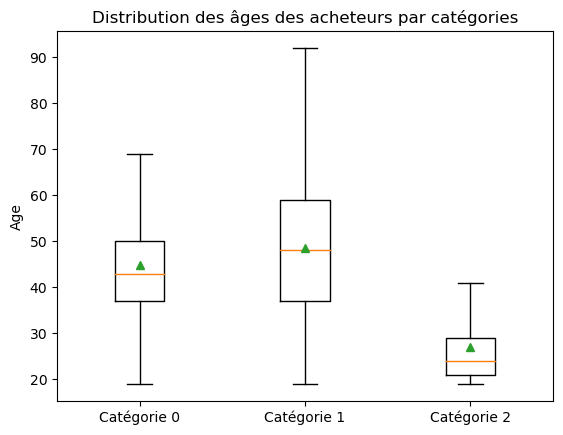

In [483]:
plt.boxplot([
    categ_age[0],
    categ_age[1],
    categ_age[2]]
    ,labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],showmeans=True, showfliers=False)
plt.ylabel("Age")
plt.title("Distribution des âges des acheteurs par catégories")
plt.show()

**Prerequis de normalité (Teste Shapiro):**

In [539]:
shapiro(df_complet[df_complet['categ']==0]['age'])

ShapiroResult(statistic=0.9367284774780273, pvalue=0.0)

In [537]:
shapiro(df_complet[df_complet['categ']==1]['age'])

ShapiroResult(statistic=0.9893467426300049, pvalue=0.0)

In [538]:
shapiro(df_complet[df_complet['categ']==2]['age'])

ShapiroResult(statistic=0.6679463386535645, pvalue=0.0)

Teste Shapiro catégorie achetée sur la variable age des clients

H0:l'échantillon suit une loi normale 

H1:l'échantillon ne suit pas une loi normale 

Si la P_value est inférieure à 0,05, on rejette H0, donc, l'échantillon ne suit pas une loi normale 

Si la P_value est supérieure à 0,05, on mantient H0, donc, l'échantillon suit une loi normale

Resultat:Les 3 échantillons ne suivent pas une loi normale. Le premier prérequis n'est pas satisfait. on passe donc, le teste Kruskal-Wallis

Pour des raisons pédacogiques, on vérifie le deuxième prérequis (Teste Levene pour l'égalité des variances)

**Prérequis: Egalité de variances (Teste Levene):**

In [541]:
st.levene(categ_age[0], categ_age[1], categ_age[2])

LeveneResult(statistic=26091.730839883516, pvalue=0.0)

Teste Levene catégorie achetée sur la variable age des clients

H0:Les trois sous-groupes ont la même variance.

H1:Il y a au moin un des sous-groupe qui a une variance différente de deux autres.

Si la P_value est inférieure à 0,05, on rejette H0, donc, les variances ne sont pas toutes égales

Si la P_value est supérieure à 0,05, on mantient H0, donc, les variances sont toutes égales

Résultat: Les variances ne sont pas toutes égales. Le deuxième prérequis ne pas satisfait non plus

**Le test centrale de Kruskal Wallis (non-parametrique):**

In [545]:
st.kruskal(categ_age[0], categ_age[1], categ_age[2])

KruskalResult(statistic=79350.86927924873, pvalue=0.0)

Le test de Kruskal Wallis, est non paramétrique

H0: Les mediane de touts les sous-groupes sont égales

H1:Il y a au moin un des sous-groupe qui a une mediane différente de deux autres.

Si la P_value est inférieure à 0,05, on rejette H0, donc, les medianes ne sont pas toutes égales

Si la P_value est supérieure à 0,05, on mantient H0, donc, les medianes sont toutes égales

Résultat: Les medianes ne sont pas toutes égales. 


Il n'y aurait pas de différence entre l'âge median d'achat par catégorie

### Age X Montant d'achat:

Etape 1: On veut étudier la relation entre l'age et le montant depensé

In [411]:
tot_achats_age = df_complet.groupby(["client_id"]).agg({"price":"sum","age":"max"})
tot_achats_age

,price,age
client_id,,
c_1,558.18,68
c_10,1353.60,67
c_100,254.85,31
c_1000,2261.89,57
c_1001,1812.86,41
...,...,...
c_995,189.41,68
c_996,1625.58,53
c_997,1490.01,29


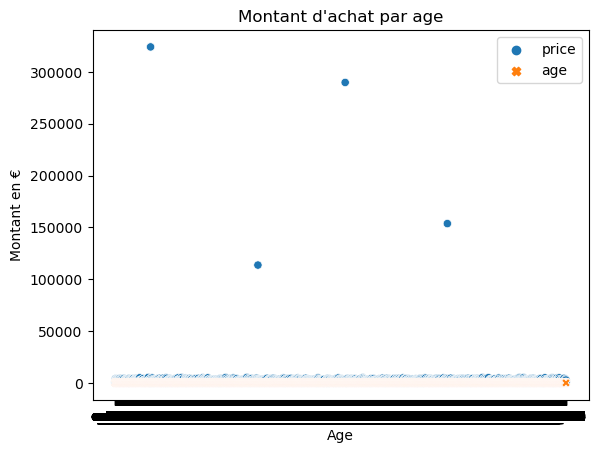

In [412]:
sns.scatterplot(data = tot_achats_age)
plt.ylabel("Montant en €")
plt.xlabel("Age")
plt.title("Montant d'achat par age")
plt.show()

**Traitement des points aberrants: analyser les clients qui dépensent moins de 50K**

In [413]:
tot_achats_age = tot_achats_age[tot_achats_age.price<50000].groupby(["age"]).agg({"price":"mean"})
tot_achats_age

,price
age,
19,1393.624005
20,1228.936414
21,1270.395310
22,1427.981600
23,1213.440882
...,...
90,658.042500
91,840.531667
92,703.862500


Constatation graphique d'une correlation

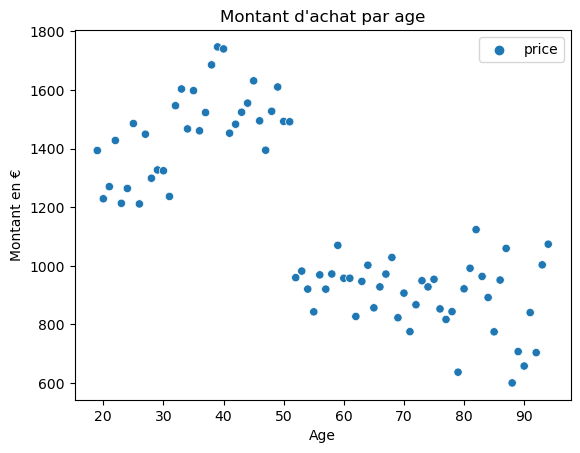

In [414]:
sns.scatterplot(data = tot_achats_age)
plt.ylabel("Montant en €")
plt.xlabel("Age")
plt.title("Montant d'achat par age")
plt.show()

On remarque qu'il n'y a pas une corrélation (one ne peut pas dessiner une elipse regroupant la majorité des points. Visuelement, on débuit qu'il n'y a pas de rélation. pour des raison pédagogiques, on continue la procédure de regression. 

Etape 2: On fixe le risque à 5% (0,05)

Etape 3: Estimation de l'equation
y (montant) = B1 * x (l'age) + B0 + residus
H0: B1 est égal à 0
H1: B1 est différent de 0
Si la P_value est inférieure à 0,05, on rejette H0, donc, le B1 est différent de 0
Si la P_value est supérieure à 0,05, on mantient H0, donc, le B1 est égal à 0

In [415]:
tot_achats_age.reset_index(inplace=True)

In [416]:
#computstat
import statsmodels.api as sm
tot_achats_age['intercept']=1
lm=sm.OLS(tot_achats_age['price'],tot_achats_age[['age','intercept']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     99.09
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.68e-15
Time:                        11:27:28   Log-Likelihood:                -510.59
No. Observations:                  76   AIC:                             1025.
Df Residuals:                      74   BIC:                             1030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.5609      1.061     -9.954      0.000     -12.675      -8.447
intercept   1740.1614     64.302     27.062      0.000    1612.037    1868.286
==============================================================================
Omnibus:                       10.382   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.241
Skew:                           0.434   Prob(JB):                       0.0728
Kurtosis:                       2.050   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y (montant) = -10.56 * x (l'age) + 1740.16 + residus
On va vérifier si les residus suivent une loi normale pour conclure la fiabilité de notre modèle
H0:l'échantillon suit une loi normale
H1:l'échantillon ne suit pas une loi normale
Si la P_value est inférieure à 0,05, on rejette H0, donc, l'échantillon ne suit pas une loi normale
Si la P_value est supérieure à 0,05, on mantient H0, donc, l'échantillon suit une loi normale

**Condition de normalité des résidus:**

In [417]:
st.shapiro(results.resid)

ShapiroResult(statistic=0.9445302486419678, pvalue=0.0023333774879574776)

Conclusion: la P_value est inférieure à 0,05, on rejette H0, donc, les residus ne suivent pas une loi normale.
Donc, on passe un test non parametrique Spearman pour conclure sur la corrélation entre les deux variables (age X montant dépensé)

**Teste non-parametrique de SpearmanR:**

In [418]:
st.spearmanr(tot_achats_age['price'],tot_achats_age['age'])

SpearmanrResult(correlation=-0.7246206425153793, pvalue=1.3672335151214274e-13)

Spearman Test:

H0:les variables sont indépendentes

H1:les variables sont dépendentes

Si la P_value est inférieure à 0,05, on rejette H0, donc, les variables sont dépendentes
Si la P_value est supérieure à 0,05, on mantient H0, donc, les variables sont indépendentes


La P_value est inférieure à 0,05, on rejette H0, donc, les variables sont dépendentes
Le coeficient de correlation R = -0.72 (entre 0,7 et 1  donc, il y a une interélation disproportionelle linéaire très forte)

### Age X Frequence d'achat :

Etape 1: On veut étudier la relation entre l'age et la frequence d'achat:

In [419]:
tot_achats_age=df_complet.groupby('client_id').agg(
    age=('age', np.max),
    count=('session_id', np.count_nonzero))
tot_achats_age

,age,count
client_id,,
c_1,68,39
c_10,67,58
c_100,31,8
c_1000,57,125
c_1001,41,102
...,...,...
c_995,68,14
c_996,53,95
c_997,29,59


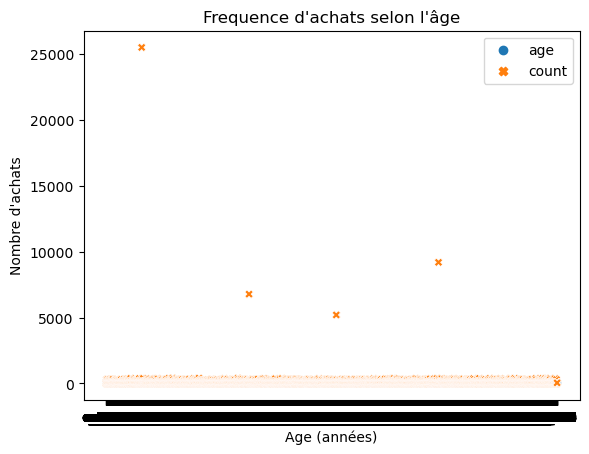

In [420]:
sns.scatterplot(data= tot_achats_age)
plt.ylabel("Nombre d'achats")
plt.xlabel("Age (années)")
plt.title("Frequence d'achats selon l'âge")
plt.show()

**Enlever les points abérrants: à partir d'un nombre d'achat de 3k (graphiquement):**

In [507]:
tot_achats_age = tot_achats_age[tot_achats_age['count']
                                <3000].groupby(["age"]).agg({"count":"mean"})
tot_achats_age

,count
age,
19,34.665904
20,30.144828
21,31.634483
22,34.016000
23,32.463235
...,...
90,40.875000
91,51.833333
92,42.500000


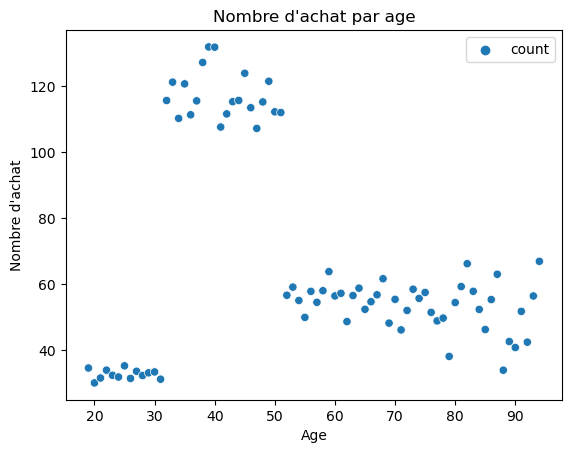

In [422]:
sns.scatterplot(data = tot_achats_age)
plt.ylabel("Nombre d'achat")
plt.xlabel("Age")
plt.title("Nombre d'achat par age")
plt.show()

Etape 3: Estimation de l'equation

y (montant) = B1 * x (l'age) + B0 + residus

H0: B1 est égal à 0

H1: B1 est différent de 0

Si la P_value est inférieure à 0,05, on rejette H0, donc, le B1 est différent de 0

Si la P_value est supérieure à 0,05, on mantient H0, donc, le B1 est égal à 0

In [423]:
tot_achats_age.reset_index(inplace=True)
tot_achats_age.head()

,age,count
0,19,34.665904
1,20,30.144828
2,21,31.634483
3,22,34.016000
4,23,32.463235


In [424]:
#computstat
import statsmodels.api as sm
tot_achats_age['intercept']=1
lm=sm.OLS(tot_achats_age['count'],tot_achats_age[['age','intercept']])
results2=lm.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.750
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0566
Time:                        11:27:53   Log-Likelihood:                -368.57
No. Observations:                  76   AIC:                             741.1
Df Residuals:                      74   BIC:                             745.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.3171      0.164     -1.936      0.057      -0.643       0.009
intercept     84.7749      9.924      8.542      0.000      65.001     104.549
==============================================================================
Omnibus:                        6.771   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.005
Skew:                           0.375   Prob(JB):                        0.135
Kurtosis:                       2.162   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y (frequence d'achat) = -0.32 * x (l'age) + 84.77 + residus
On va vérifier si les residus suivent une loi normale pour conclure la fiabilité de notre modèle
H0:l'échantillon suit une loi normale
H1:l'échantillon ne suit pas une loi normale
Si la P_value est inférieure à 0,05, on rejette H0, donc, l'échantillon ne suit pas une loi normale
Si la P_value est supérieure à 0,05, on mantient H0, donc, l'échantillon suit une loi normale

**Condition: Normalité des résidus:**

In [425]:
st.shapiro(results2.resid)

ShapiroResult(statistic=0.9007810354232788, pvalue=2.0692274119937792e-05)

Conclusion: la P_value est inférieure à 0,05, on rejette H0, donc, les residus ne suivent pas une loi normale
Donc, on passe un test non parametrique Spearman pour conclure sur la corrélation entre les deux variables (age X montant dépensé)

Spearman Test:

H0:les variables sont indépendentes

H1:les variables sont dépendentes

Si la P_value est inférieure à 0,05, on rejette H0, donc, les variables sont dépendentes

Si la P_value est supérieure à 0,05, on mantient H0, donc, les variables sont indépendentes

**Teste non-parametrique de SpearmanR:**

In [426]:
st.spearmanr(tot_achats_age['count'],tot_achats_age['age'])

SpearmanrResult(correlation=-0.00016404647983595352, pvalue=0.9988778380717482)

La P_value est superieure à 0,05, on mantient H0, donc, les variables sont indépendentes

**On veut explorer la rélation que pour la 3eme catégorie d'age: supérieure à 50 ans:**

In [427]:
lm=sm.OLS(tot_achats_age[tot_achats_age.age>50]['count'],tot_achats_age[tot_achats_age.age>50][['age','intercept']])
results2=lm.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6.531
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0143
Time:                        11:27:53   Log-Likelihood:                -165.23
No. Observations:                  44   AIC:                             334.5
Df Residuals:                      42   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.3212      0.126     -2.555      0.014      -0.575      -0.068
intercept     78.3894      9.250      8.474      0.000      59.722      97.057
==============================================================================
Omnibus:                       47.367   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.615
Skew:                           2.579   Prob(JB):                     5.64e-53
Kurtosis:                      13.229   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Condition: Normalité des résidus:**

In [428]:
st.shapiro(results2.resid)

ShapiroResult(statistic=0.784675121307373, pvalue=1.377011471959122e-06)

Conclusion: la P_value est inférieure à 0,05, on rejette H0, donc, les residus ne suivent pas une loi normale
Donc, on passe un test non parametrique Spearman pour conclure sur la corrélation entre les deux variables (age X fréquence d'achat)

### Age X Prix Moyen:

Etape 1: On veut étudier la relation entre l'age et le prix moyen:

In [562]:
age_pix_moyen=df_complet.groupby('client_id').agg(
    age=('age', np.max),
    prix_moyen=('price', np.mean),
    nb_ventes=('session_id', np.count_nonzero))
age_pix_moyen

,age,prix_moyen,nb_ventes
client_id,,,
c_1,68,14.312308,39
c_10,67,23.337931,58
c_100,31,31.856250,8
c_1000,57,18.095120,125
c_1001,41,17.773137,102
...,...,...,...
c_995,68,13.529286,14
c_996,53,17.111368,95
c_997,29,25.254407,59


In [563]:
age_pix_moyen.reset_index(inplace=True)
age_pix_moyen.head()

,client_id,age,prix_moyen,nb_ventes
0,c_1,68,14.312308,39
1,c_10,67,23.337931,58
2,c_100,31,31.856250,8
3,c_1000,57,18.095120,125
4,c_1001,41,17.773137,102


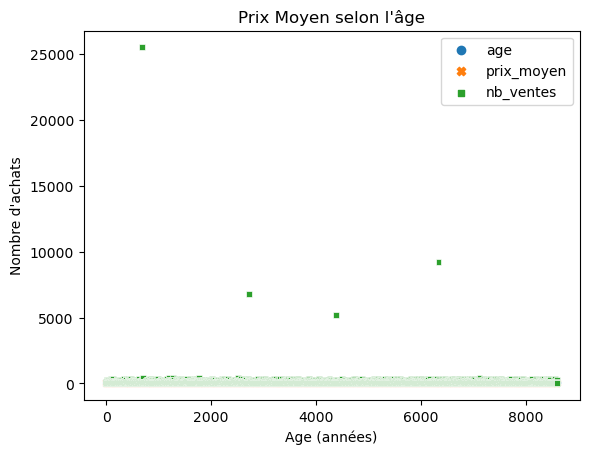

In [564]:
sns.scatterplot(data= age_pix_moyen)
plt.ylabel("Nombre d'achats")
plt.xlabel("Age (années)")
plt.title("Prix Moyen selon l'âge")
plt.show()

In [565]:
age_pix_moyen = age_pix_moyen[age_pix_moyen['prix_moyen']
                                <3000].groupby(["age"]).agg({"prix_moyen":"mean"})
age_pix_moyen

,prix_moyen
age,
19,40.962838
20,44.401066
21,40.802707
22,44.884187
23,38.891203
...,...
90,16.048921
91,16.620300
92,17.350981


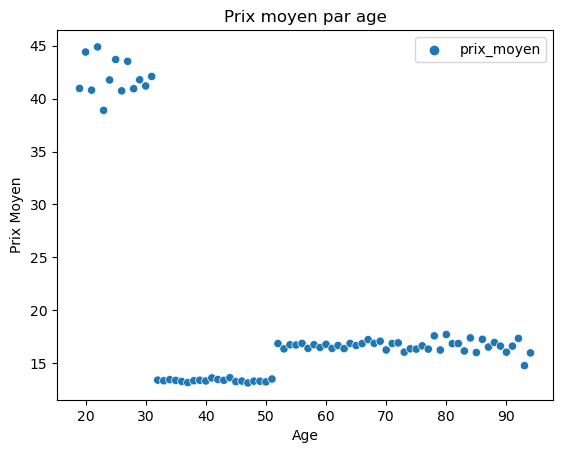

In [566]:
sns.scatterplot(data = age_pix_moyen)
plt.ylabel("Prix Moyen")
plt.xlabel("Age")
plt.title("Prix moyen par age")
plt.show()

In [567]:
age_pix_moyen.reset_index(inplace=True)
age_pix_moyen.head()

,age,prix_moyen
0,19,40.962838
1,20,44.401066
2,21,40.802707
3,22,44.884187
4,23,38.891203


In [568]:
#computstat
import statsmodels.api as sm
age_pix_moyen['intercept']=1
lm=sm.OLS(age_pix_moyen['prix_moyen'],age_pix_moyen[['age', 'intercept']])
results3=lm.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prix_moyen   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     34.31
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.21e-07
Time:                        16:22:21   Log-Likelihood:                -268.78
No. Observations:                  76   AIC:                             541.6
Df Residuals:                      74   BIC:                             546.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.2580      0.044     -5.857      0.000      -0.346      -0.170
intercept     34.6936      2.669     12.997      0.000      29.375      40.012
==============================================================================
Omnibus:                        4.795   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                2.785
Skew:                           0.252   Prob(JB):                        0.249
Kurtosis:                       2.209   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y (Prix moyen) = -0.37 * x (l'age) + 34.69 + residus
On va vérifier si les residus suivent une loi normale pour conclure la fiabilité de notre modèle
H0:l'échantillon suit une loi normale
H1:l'échantillon ne suit pas une loi normale
Si la P_value est inférieure à 0,05, on rejette H0, donc, l'échantillon ne suit pas une loi normale
Si la P_value est supérieure à 0,05, on mantient H0, donc, l'échantillon suit une loi normale

**Condition: Normalité des résidus:**

In [569]:
st.shapiro(results3.resid)

ShapiroResult(statistic=0.9473468065261841, pvalue=0.00331050343811512)

Conclusion: la P_value est inférieure à 0,05, on rejette H0, donc, les residus ne suivent pas une loi normale
Donc, on passe un test non parametrique Spearman pour conclure sur la corrélation entre les deux variables (age X prix moyen)

**Teste non-parametrique de SpearmanR:**

In [571]:
st.spearmanr(age_pix_moyen['prix_moyen'],age_pix_moyen['age'])

SpearmanrResult(correlation=-0.08002734107997267, pvalue=0.49195478020821815)

Spearman Test:

H0:les variables sont indépendentes

H1:les variables sont dépendentes

Si la P_value est inférieure à 0,05, on rejette H0, donc, les variables sont dépendentes

Si la P_value est supérieure à 0,05, on mantient H0, donc, les variables sont indépendentes

La P_value est supérieure à 0,05, on maintient H0, donc, les variables sont indépendantes